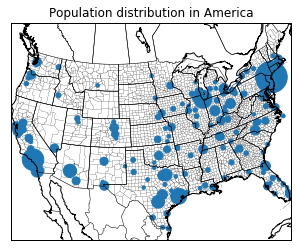

In [9]:
# %load Day26.py
# 重點:
# 導入PANDAS, 利用PANDAS 的數據繪製關係圖

# 如何自行輸入經緯度繪製所在區域的地圖

# 學習如何讀取氣象資訊檔: netCDF4

# 有疑問, 請多提出來, 有專家陪跑


#載入氣象資訊檔, 提供解讀檔案資訊
# !pip install netCDF4

# 導入數據集
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

posi=pd.read_csv("2014_us_cities.csv") # 讀取數據

#取得資料集資訊
# posi.info()
# posi.head()

# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float) # 獲取人口數，轉化為numpy浮點型
                                 #要轉乘浮點數
map = Basemap(projection='stere',lat_0=90,lon_0=-105,
            llcrnrlat=23.41 ,urcrnrlat=45.44,
            llcrnrlon=-118.67,urcrnrlon=-64.52,
            rsphere=6371200., resolution='l', area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

# 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
size=(pop / np.max(pop))*1000 

x,y = map(lon,lat)

map.scatter(x,y,s=size)

plt.title('Population distribution in America')
plt.show()



enter reference longitude (lon_0):128


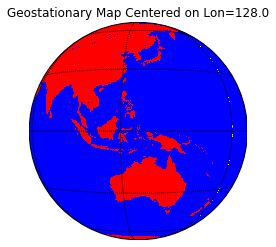

In [3]:

####################################################################
# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(input('enter reference longitude (lon_0):'))
               #輸入經度值
#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()

# 把剛剛的 lon_0 代入並畫圖      #已經為維中心
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution=None)

m.drawlsmask(land_color='red',ocean_color='blue',lakes=True)

# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))
plt.show()

In [19]:
!pip install Cartopy-0.19.0.post1-cp37-cp37m-win_amd64.whl

Processing d:\github\ml100days\資料科學馬拉松\cartopy-0.19.0.post1-cp37-cp37m-win_amd64.whl


In [21]:


######################################################
from netCDF4 import Dataset as NetCDFFile

# 導入資料庫與套件
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 利用 netCDF 中的 Dataset 獲取我們載下的檔案並去使用它，這裡是載 MERRA2_200.tavgM_2d_slv_Nx.199907.nc4 (可選)
data = Dataset('MERRA2_200.tavgM_2d_slv_Nx.199907.nc4', mode='r')

# 其實 data 就是一個字典
data.variables.keys()

# 設定經緯度，並讀入 T2M (兩公尺的溫度變數)
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
T2M = data.variables['T2M'][:,:,:]

# 若在文件中使用多個時間索引的 MERRA-2 數據，以下將提取第一個時間索引。
T2M = T2M[0,:,:]  #T2M為3維資料，所以要取三層

# 設置圖形大小，投影和範圍
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())   # 在羅賓森投影上使用繪圖函數
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)   # 解析度為粗糙
ax.gridlines(linestyle='--',color='black')

# 設置輪廓線級別，接著繪製圖和顏色欄
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, July 1999', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
plt.show()

OSError: [WinError 126] 找不到指定的模組。